In [12]:
name = "Luis Vitor Pedreira Iten Zerkowski & Ígor de Andrade Barberino"  # write YOUR NAME

honorPledge = "I affirm that I have not given or received any unauthorized " \
              "help on this assignment, and that this work is my own.\n"

print("\nName: ", name)
print("\nHonor pledge: ", honorPledge)



Name:  Luis Vitor Pedreira Iten Zerkowski & Ígor de Andrade Barberino

Honor pledge:  I affirm that I have not given or received any unauthorized help on this assignment, and that this work is my own.



In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

%matplotlib inline

In [14]:
(X_train_ori, y_train_ori), (X_test_ori, y_test_ori) = mnist.load_data()

print(X_train_ori.shape, y_train_ori.shape)
print(X_test_ori.shape, y_test_ori.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


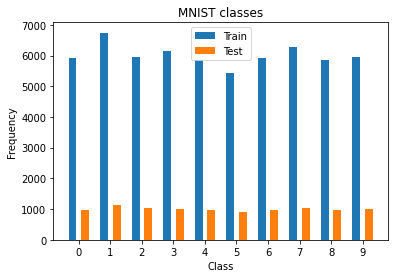

In [15]:
labels = ["%s"%i for i in range(10)]

unique, counts = np.unique(y_train_ori, return_counts=True)
uniquet, countst = np.unique(y_test_ori, return_counts=True)

fig, ax = plt.subplots()
rects1 = ax.bar(unique - 0.2, counts, 0.25, label='Train')
rects2 = ax.bar(unique + 0.2, countst, 0.25, label='Test')
ax.legend()
ax.set_xticks(unique)
ax.set_xticklabels(labels)

plt.title('MNIST classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

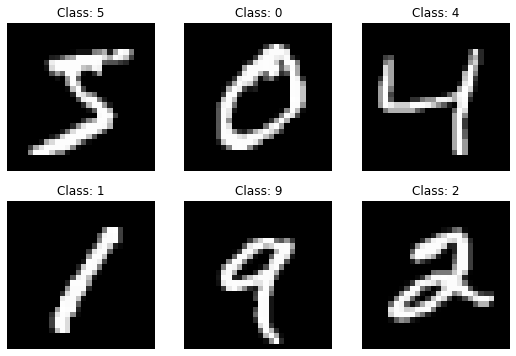

In [16]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):
    ax[i//3, i%3].imshow(X_train_ori[i], cmap='gray')
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Class: %d"%y_train_ori[i])
    
plt.show()

In [17]:
# Reduce the image size to its half 
X_train = np.array([image[::2, 1::2] for image in X_train_ori])
X_test  = np.array([image[::2, 1::2] for image in X_test_ori])

y_train = y_train_ori
y_test = y_test_ori

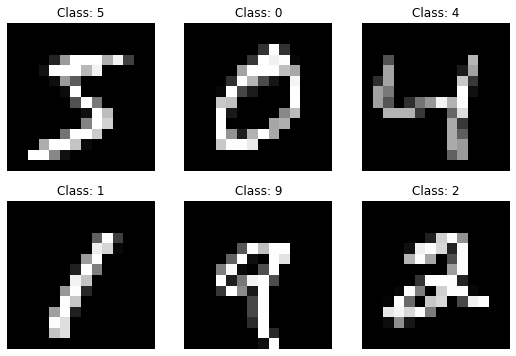

In [18]:
fig, ax = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):
    ax[i//3, i%3].imshow(X_train[i], cmap='gray')
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Class: %d"%y_train_ori[i])
    
plt.show()

In [19]:
X_train = (X_train/255.0).astype('float32').reshape((60000,14*14))
X_test = (X_test/255.0).astype('float32').reshape((10000,14*14))

print(X_train.dtype)
print(X_test.dtype)

print("\nShape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

print("\nMinimum value in X_train:", np.amin(X_train))
print("Maximum value in X_train:", np.amax(X_train))

print("\nMinimum value in X_test:", np.amin(X_test))
print("Maximum value in X_test:", np.amax(X_test))


float32
float32

Shape of X_train:  (60000, 196)
Shape of X_test:  (10000, 196)

Minimum value in X_train: 0.0
Maximum value in X_train: 1.0

Minimum value in X_test: 0.0
Maximum value in X_test: 1.0


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, f1_score, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import time

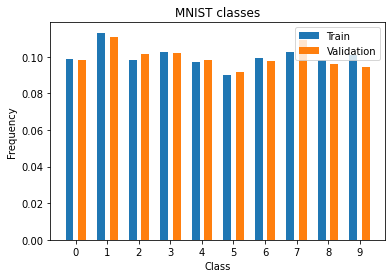

In [21]:
#train and validation split 70/30
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.3, random_state=10)

labels = ["%s"%i for i in range(10)]

unique, counts = np.unique(y_train, return_counts=True)
uniquev, countsv = np.unique(y_val, return_counts=True)

counts = counts/counts.sum()
countsv = countsv/countsv.sum()

fig, ax = plt.subplots()
rects1 = ax.bar(unique - 0.2, counts, 0.25, label='Train')
rects2 = ax.bar(uniquev + 0.2, countsv, 0.25, label='Validation')
ax.legend()
ax.set_xticks(unique)
ax.set_xticklabels(labels)

plt.title('MNIST classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [22]:
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train,
                                                                                      test_size=0.3, random_state=10)

/home/lui/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lui/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Best parameters:
Number of iterations: 300.0
C value: 3
Accuracy in the training set: 0.919421768707483
F1 score in the training set: 0.9067873016711705
Log loss in the training set: 0.32176490497765015
Confusion matrix:


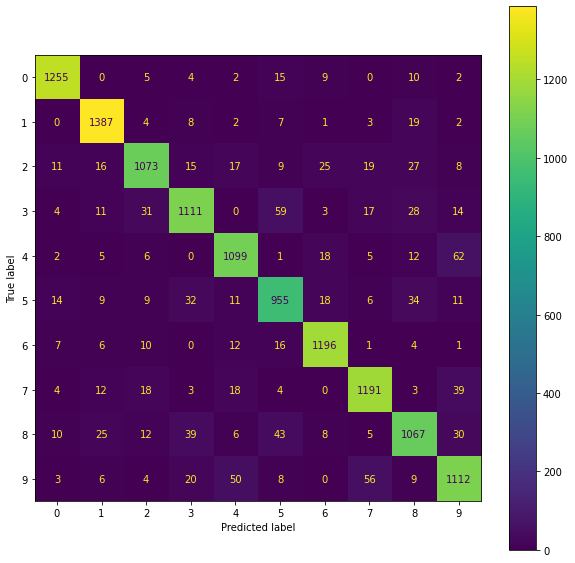

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

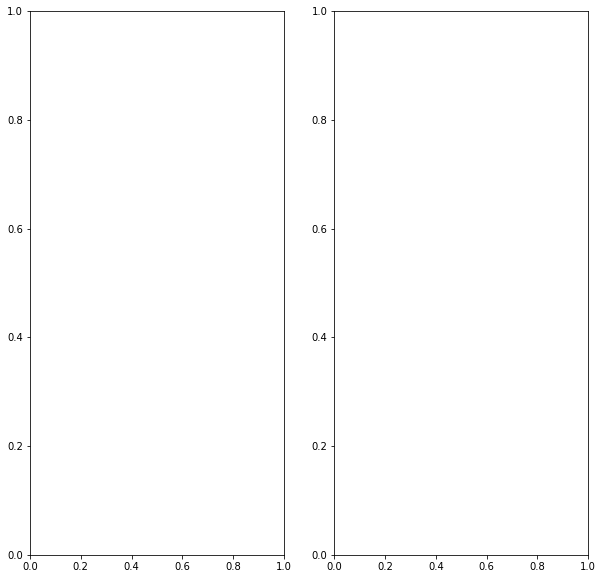

In [23]:
#Logistic regression classifier
start_time = time.time()
best_accuracy = 0
best_f1 = 0
best_log_loss = 100000
opt_iter = -1
opt_C = -1
accuracy_hist = []
f1_score_hist = []
log_loss_hist = []
for i in np.linspace(100, 300, 3):
    for j in range(1, 4):
        logistic_clf = LogisticRegression(random_state=10, max_iter=i,
                                        tol=0.0001, C=j).fit(X_train_train, y_train_train)
        
        #Train scores
        predictions = logistic_clf.predict(X_train_val)
        predictions_prob = logistic_clf.predict_proba(X_train_val)

        accuracy_val = logistic_clf.score(X_train_train, y_train_train)
        f1_score_val = f1_score(y_true=y_train_val, y_pred=predictions, labels=np.unique(y_train_val), average='macro')
        log_loss_val = log_loss(y_true=y_train_val, y_pred=predictions_prob, labels=np.unique(y_train_val))

        accuracy_hist.append((i, j, accuracy_val))
        f1_score_hist.append((i, j, f1_score_val))
        log_loss_hist.append((i, j, log_loss_val))

        if accuracy_val+0.001 > best_accuracy and f1_score_val+0.001 > best_f1 and log_loss_val-0.001 < best_log_loss:
            best_accuracy = accuracy_val
            best_f1 = f1_score_val
            best_log_loss = log_loss_val
            
            opt_iter = i
            opt_C = j

print("Best parameters:")
print("Number of iterations: {}".format(opt_iter))
print("C value: {}".format(opt_C))
print("Accuracy in the training set: {}".format(best_accuracy))
print("F1 score in the training set: {}".format(best_f1))
print("Log loss in the training set: {}".format(best_log_loss))

print("Confusion matrix:")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_confusion_matrix(logistic_clf, X_train_val, y_train_val, labels=np.unique(y_train_val), ax=ax)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0, 0].plot(accuracy_hist[:][0], accuracy_hist[:][2])
ax[0, 0].axis('off')
ax[0, 0].set_title("Accuracy x Number of iterations: ")

ax[0, 1].plot(accuracy_hist[:][1], accuracy_hist[:][2])
ax[0, 1].axis('off')
ax[0, 1].set_title("Accuracy x C value: ")

plt.show()

time_logistic = (time.time() - start_time)
print("Execution time: {}".format(time_logistic))

In [ ]:
#Neural network classifier
start_time = time.time()
for i in range(1, 2):
    neural_net_clf = MLPClassifier(random_state=10, max_iter=i*100, tol=0.0001,
                                   hidden_layer_sizes=(7, 256), learning_rate_init=0.001,
                                   learning_rate='invscaling', power_t=0.5, 
                                   validation_fraction=0, batch_size=128, verbose=True).fit(X_train, y_train)

    #Train scores
    predictions = neural_net_clf.predict(X_train)

    print("Accuracy on training set: {}".format(neural_net_clf.score(X_train, y_train)))
    
    f1_score_train = f1_score(y_true=y_train, y_pred=predictions, labels=np.unique(y_train), average = 'macro')
    print("F1 score in the training set: {}".format(f1_score_train))

    print("Confusion matrix:")
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    plot_confusion_matrix(neural_net_clf, X_train, y_train, labels=np.unique(y_train), ax=ax)
    plt.show()

time_nn = (time.time() - start_time)
print("Execution time: {}".format(time_nn))

In [ ]:
#SVM classifier
start_time = time.time()
for i in range(1, 2):
    svm_clf = SVC(random_state=10, max_iter=i*(-1), tol=0.001,
                  C=1, kernel='rbf', verbose=True,
                  decision_function_shape='ovr').fit(X_train, y_train)

    #Train scores
    predictions = svm_clf.predict(X_train)

    print("Accuracy on training set: {}".format(svm_clf.score(X_train, y_train)))
    
    f1_score_train = f1_score(y_true=y_train, y_pred=predictions, labels=np.unique(y_train), average = 'macro')
    print("F1 score in the training set: {}".format(f1_score_train))

    print("Confusion matrix:")
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    plot_confusion_matrix(svm_clf, X_train, y_train, labels=np.unique(y_train), ax=ax)
    plt.show()

time_svm = (time.time() - start_time)
print("Execution time: {}".format(time_svm))